In [1]:
# Table
import pandas as pd
import numpy as np
import datetime
import random

# Graphic
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

# Regression Algorithm:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Model Helper
from sklearn.model_selection import train_test_split

# Preprocess
from sklearn.preprocessing import  StandardScaler

# Regression
import math
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as sci

In [2]:
#Step-1 Load data
dataset = pd.read_csv("diamonds.csv")# load dataset
print(dataset.head(10)) #visualise

   Unnamed: 0  carat        cut color clarity  depth  table     x     y     z  \
0           1   0.23      Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43   
1           2   0.21    Premium     E     SI1   59.8   61.0  3.89  3.84  2.31   
2           3   0.23       Good     E     VS1   56.9   65.0  4.05  4.07  2.31   
3           4   0.29    Premium     I     VS2   62.4   58.0  4.20  4.23  2.63   
4           5   0.31       Good     J     SI2   63.3   58.0  4.34  4.35  2.75   
5           6   0.24  Very Good     J    VVS2   62.8   57.0  3.94  3.96  2.48   
6           7   0.24  Very Good     I    VVS1   62.3   57.0  3.95  3.98  2.47   
7           8   0.26  Very Good     H     SI1   61.9   55.0  4.07  4.11  2.53   
8           9   0.22       Fair     E     VS2   65.1   61.0  3.87  3.78  2.49   
9          10   0.23  Very Good     H     VS1   59.4   61.0  4.00  4.05  2.39   

   price  
0    326  
1    326  
2    327  
3    334  
4    335  
5    336  
6    336  
7    337  
8    337 

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64


<AxesSubplot:>

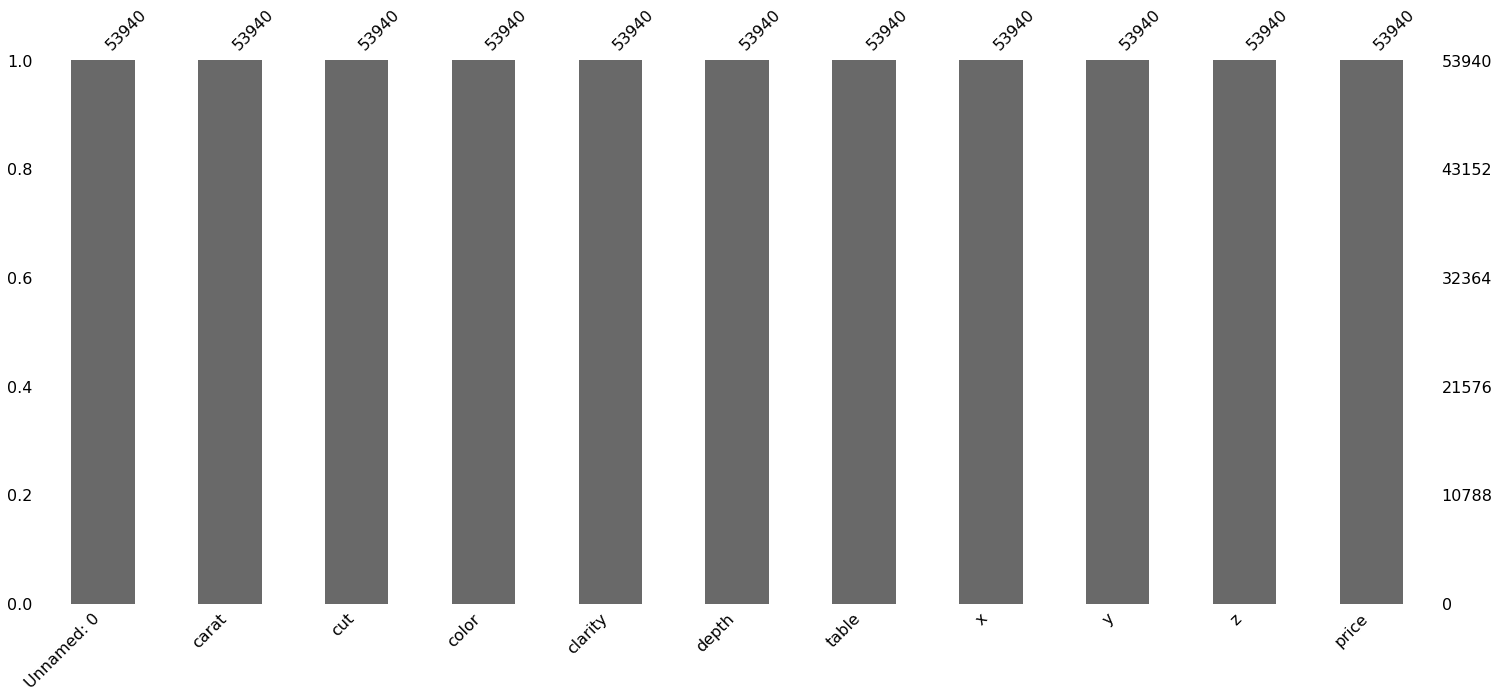

In [3]:
#Step-2 Analyse (missing values)
print(dataset.isnull().sum()) # Missing value Non-graphic
msno.bar(dataset,labels=True) # Missing value Graphic

In [4]:
#Step-2 Analyse (outliers)
print(dataset.describe()) # Non-graphic
# Lowest value for X,Y,Z (length, width, depth) is 0 this is impossible - indication of outlier
# We will determine which instances have outliers
print(dataset.loc[(dataset['x']==0) | (dataset['y']==0) | (dataset['z']==0)])
print(dataset.loc[(dataset['x']>30) | (dataset['y']>30) | (dataset['z']>30)])
print("Number of instances with 0 value for X,Y,Z: ")
print(len(dataset.loc[(dataset['x']==0) | (dataset['y']==0) | (dataset['z']==0)]))
print("Number of instances with value over 30 for X,Y,Z: ")
print(len(dataset.loc[(dataset['x'] >30) | (dataset['y'] >30) | (dataset['z']>30)]))

         Unnamed: 0         carat         depth         table             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184      5.731157   
std    15571.281097      0.474011      1.432621      2.234491      1.121761   
min        1.000000      0.200000     43.000000     43.000000      0.000000   
25%    13485.750000      0.400000     61.000000     56.000000      4.710000   
50%    26970.500000      0.700000     61.800000     57.000000      5.700000   
75%    40455.250000      1.040000     62.500000     59.000000      6.540000   
max    53940.000000      5.010000     79.000000     95.000000     10.740000   

                  y             z         price  
count  53940.000000  53940.000000  53940.000000  
mean       5.734526      3.538734   3932.799722  
std        1.142135      0.705699   3989.439738  
min        0.000000      0.000000    326.000000  
25%        4.720000      2.910000    9

In [5]:
#Step-3 Preprocess (outliers)
dataset = dataset[(dataset[['x', 'y', 'z']] != 0).all(axis=1)] #Remove instances with 0 value for X,Y,Z
dataset = dataset[(dataset[['x', 'y', 'z']] < 30).all(axis=1)] #Remove instances with value over 30 for X,Y,Z
#Check for successful removal
print("Number of instances with 0 value for X,Y,Z: ")
print(len(dataset.loc[(dataset['x']==0) | (dataset['y']==0) | (dataset['z']==0)]))
print("Number of instances with value over 30 for X,Y,Z: ")
print(len(dataset.loc[(dataset['x'] >30) | (dataset['y'] >30) | (dataset['z']>30)]))

Number of instances with 0 value for X,Y,Z: 
0
Number of instances with value over 30 for X,Y,Z: 
0


In [6]:
#Step-3 Preprocess (remove irrelevant features)
dataset.drop(['Unnamed: 0'] , axis=1 , inplace=True)# remove the first column
print(dataset.head(5))# check

   carat      cut color clarity  depth  table     x     y     z  price
0   0.23    Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43    326
1   0.21  Premium     E     SI1   59.8   61.0  3.89  3.84  2.31    326
2   0.23     Good     E     VS1   56.9   65.0  4.05  4.07  2.31    327
3   0.29  Premium     I     VS2   62.4   58.0  4.20  4.23  2.63    334
4   0.31     Good     J     SI2   63.3   58.0  4.34  4.35  2.75    335


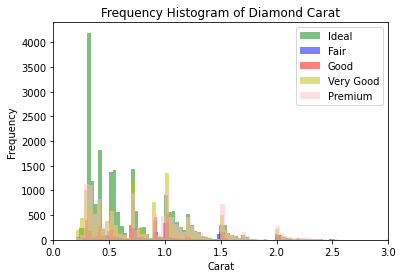

In [7]:
#Step-4 Exploratory Data Analysis: Histogram
#https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/

x1 = dataset.loc[dataset.cut=='Ideal', 'carat']
x2 = dataset.loc[dataset.cut=='Fair', 'carat']
x3 = dataset.loc[dataset.cut=='Good', 'carat']
x4 = dataset.loc[dataset.cut=='Very Good', 'carat']
x5 = dataset.loc[dataset.cut=='Premium', 'carat']

kwargs = dict(alpha=0.5, bins=100)

plt.hist(x1, **kwargs, color='g', label='Ideal')
plt.hist(x2, **kwargs, color='b', label='Fair')
plt.hist(x3, **kwargs, color='r', label='Good')
plt.hist(x4, **kwargs, color='y', label='Very Good')
plt.hist(x5, **kwargs, color='pink', label='Premium')
plt.gca().set(title='Frequency Histogram of Diamond Carat', ylabel='Frequency', xlabel='Carat')
plt.xlim(0,3)
plt.legend();

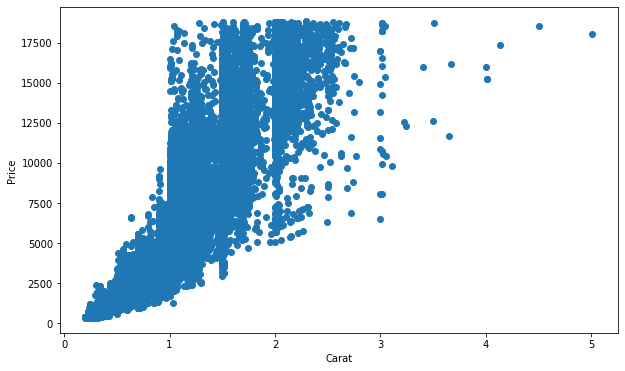

In [8]:
#Step-4 Exploratory Data Analysis: Scatter-plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = dataset['carat'], y = dataset['price'])
plt.xlabel("Carat")
plt.ylabel("Price")

plt.show()

In [9]:
#Step-4 Exploratory Data Analysis - making categorical variables numerical (prep for normalisation and correlation)
mappingCut = {'Ideal': 60, 'Fair': 70,'Good': 80,'Very Good': 90, 'Premium': 100}
mappingCla = {'I1': 30, 'SI1': 40, 'SI2': 50, 'VS1': 60, 'VS2': 70, 'VVS1': 80, 'VVS2': 90, 'IF': 100}
mappingCol = {'J': 40, 'I': 50 , 'H': 60, 'G': 70,'F': 80 ,'E': 90, 'D': 100}
dataset = dataset.replace({'cut': mappingCut, 'clarity': mappingCla, 'color':mappingCol})
print(dataset.head(5))# check

   carat  cut  color  clarity  depth  table     x     y     z  price
0   0.23   60     90       50   61.5   55.0  3.95  3.98  2.43    326
1   0.21  100     90       40   59.8   61.0  3.89  3.84  2.31    326
2   0.23   80     90       60   56.9   65.0  4.05  4.07  2.31    327
3   0.29  100     50       70   62.4   58.0  4.20  4.23  2.63    334
4   0.31   80     40       50   63.3   58.0  4.34  4.35  2.75    335


In [10]:
#Step-4 Exploratory Data Analysis - normalise [0,1]
for column in dataset.columns:
    dataset[column] = (dataset[column] - dataset[column].min()) / (dataset[column].max() - dataset[column].min())

print(dataset.head(5))# check

      carat  cut     color   clarity     depth     table         x         y  \
0  0.006237  0.0  0.833333  0.285714  0.513889  0.230769  0.031384  0.043732   
1  0.002079  1.0  0.833333  0.142857  0.466667  0.346154  0.022825  0.023324   
2  0.006237  0.5  0.833333  0.428571  0.386111  0.423077  0.045649  0.056851   
3  0.018711  1.0  0.166667  0.571429  0.538889  0.288462  0.067047  0.080175   
4  0.022869  0.5  0.000000  0.285714  0.563889  0.288462  0.087019  0.097668   

          z     price  
0  0.230118  0.000000  
1  0.209814  0.000000  
2  0.209814  0.000054  
3  0.263959  0.000433  
4  0.284264  0.000487  


<AxesSubplot:>

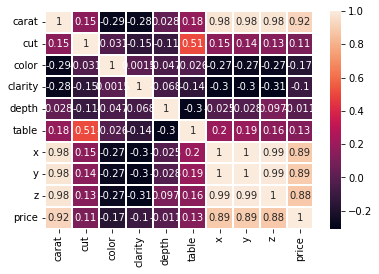

In [11]:
#Step-4 Exploratory Data Analysis - Correlation
corr = dataset.corr()
sns.heatmap(data = corr, annot = True, cbar = True, linewidths = 0.3)

#x, y, z is highly correlated with each other and price and carat
#price and carat are also highly correlated

In [12]:
#Split data into train and test set
Trainset,Testset = train_test_split(dataset, test_size = 0.3, random_state = 309)

#Set target (y)
train_data_temporary = Trainset.copy()
X_train = train_data_temporary.drop(["price"],axis=1)
y_train = Trainset["price"]
   
test_data_temporary=Testset.copy()
X_test = test_data_temporary.drop(["price"],axis=1)
y_test = test_data_temporary["price"]

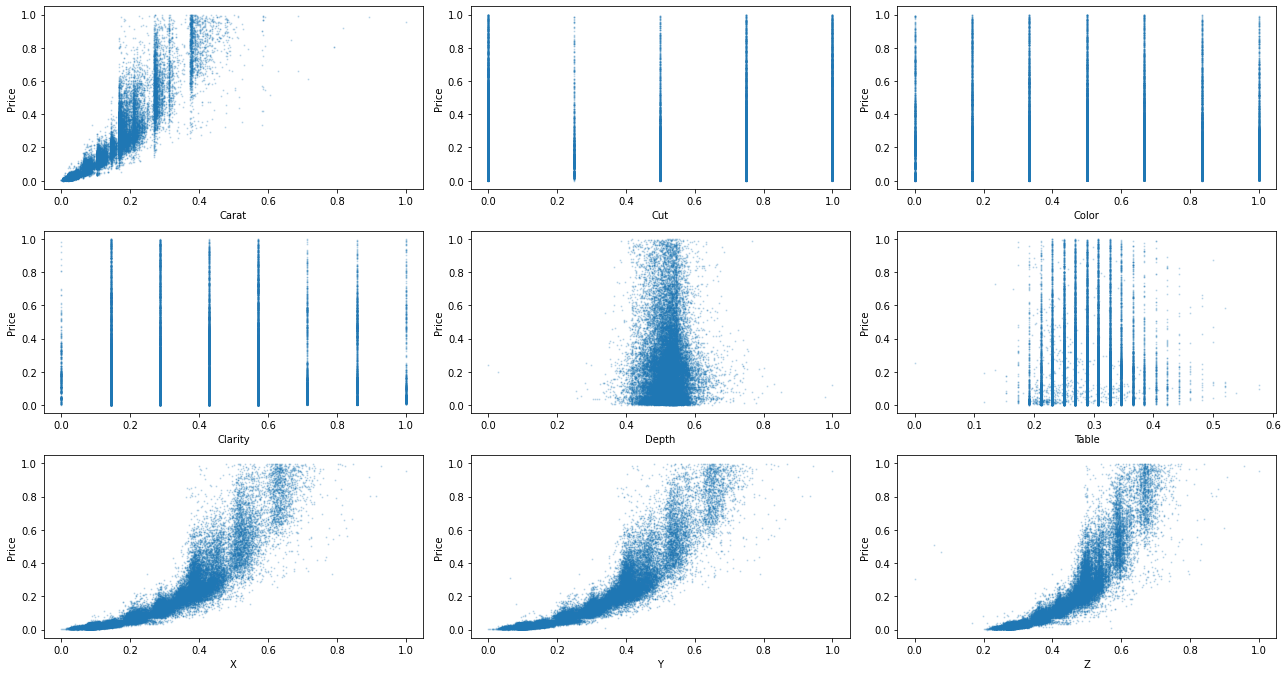

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(18, 10))
axs = axs.ravel()
axs[0].scatter(Trainset.carat, Trainset.price, alpha = 0.2, s = 1)
axs[0].set_xlabel('Carat')
axs[1].scatter(Trainset.cut, Trainset.price, alpha = 0.2, s = 1)
axs[1].set_xlabel('Cut')
axs[2].scatter(Trainset.color, Trainset.price, alpha = 0.2, s = 1)
axs[2].set_xlabel('Color')
axs[3].scatter(Trainset.clarity, Trainset.price, alpha = 0.2, s = 1)
axs[3].set_xlabel('Clarity')
axs[4].scatter(Trainset.depth, Trainset.price, alpha = 0.2, s = 1)
axs[4].set_xlabel('Depth')
axs[5].scatter(Trainset.table, Trainset.price, alpha = 0.2, s = 1)
axs[5].set_xlabel('Table')
axs[6].scatter(Trainset.x, Trainset.price, alpha = 0.2, s = 1)
axs[6].set_xlabel('X')
axs[7].scatter(Trainset.y, Trainset.price, alpha = 0.2, s = 1)
axs[7].set_xlabel('Y')
axs[8].scatter(Trainset.z, Trainset.price, alpha = 0.2, s = 1)
axs[8].set_xlabel('Z')

for i in range(9):
    axs[i].set_ylabel('Price')
    axs[i].set_xlim(auto = True)
    axs[i].set_ylim(auto = True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [14]:
#Method to print regression result
def PrintResult(regressor, label):
    start_time = datetime.datetime.now() #start timer
    regressor.fit(X_train, y_train) #get param regressor to fit data
    y_pred = regressor.predict(X_test) #get predictions after data has been fitted
    end_time = datetime.datetime.now() #get time at end of regression fitting
    duration = (end_time - start_time).total_seconds() #get total time it takes for model to run

    MSE = mean_squared_error(y_test, y_pred) # mean squared error
    RMSE = math.pow(mean_squared_error(y_test, y_pred), 0.5) # root mean squared error
    RSE = r2_score(y_test, y_pred) # relative squared error
    MAE = mean_absolute_error(y_test, y_pred) #mean absolute error
    
    print("--------------------------")
    print("Regressor: " + label)
    print(label + ' MSE : %0.2f ' % MSE)
    print(label + ' RMSE : %0.2f ' % RMSE)
    print(label + ' RSE : %0.2f ' % RSE)
    print(label + ' MAE : %0.2f ' % MAE)
    print("Execution time: {t:.3f} seconds".format(t = duration))
    print("--------------------------")

--------------------------


NameError: name 'label' is not defined

In [ ]:
# (1) linear regression

In [ ]:
# (2) k-neighbors regression

In [ ]:
# (3) Ridge regression

In [ ]:
# (4) decision tree regression

In [ ]:
# (5) random forest regression

In [ ]:
# (6) gradient Boosting regression

In [ ]:
# (7) SGD regression

In [ ]:
# (8) support vector regression (SVR)

In [ ]:
# (9) linear SVR

In [ ]:
# (10) multi-layer perceptron regression